# 第 2 章第 2 节-求质数、蒙特卡洛算法计算 π、使用 NumPy 完成多项式回归

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 埃拉托斯特尼筛法生成质数序列

目标：求 [0,100] 内所有的质数。

首先我们要明确，假设一个合数 $x$ 能表示为两个数的乘积，他必定有一个小于等于 $\sqrt{x}$ 的因子，这可以用反证法证明。

证明：如果两个因子都大于 $\sqrt{x}$，那么乘积大于 $x$，这和假设矛盾。

![](https://img-blog.csdn.net/20150604215737644?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQveF9pX3lfdV9l/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

In [14]:
a = np.arange(1, 101)

print('1 到 100：', a)

# 最多到根号下 100
n_max = int(np.sqrt(len(a)))

# 初始化的时候，认为全部都是质数，是在 Python 中就是 1 的意思
is_prime = np.ones(len(a), dtype=bool)

# 1 不是质数，所以设置成 False
is_prime[0] = False

for i in range(2, n_max):
    if i in a[is_prime]:
        # 减 1 是为了修复从 0 开始的索引的问题
        is_prime[(i**2 - 1)::i] = False
print('质数是：')
print(a[is_prime])

1 到 100： [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
质数是：
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


## 随机漫步算法

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """


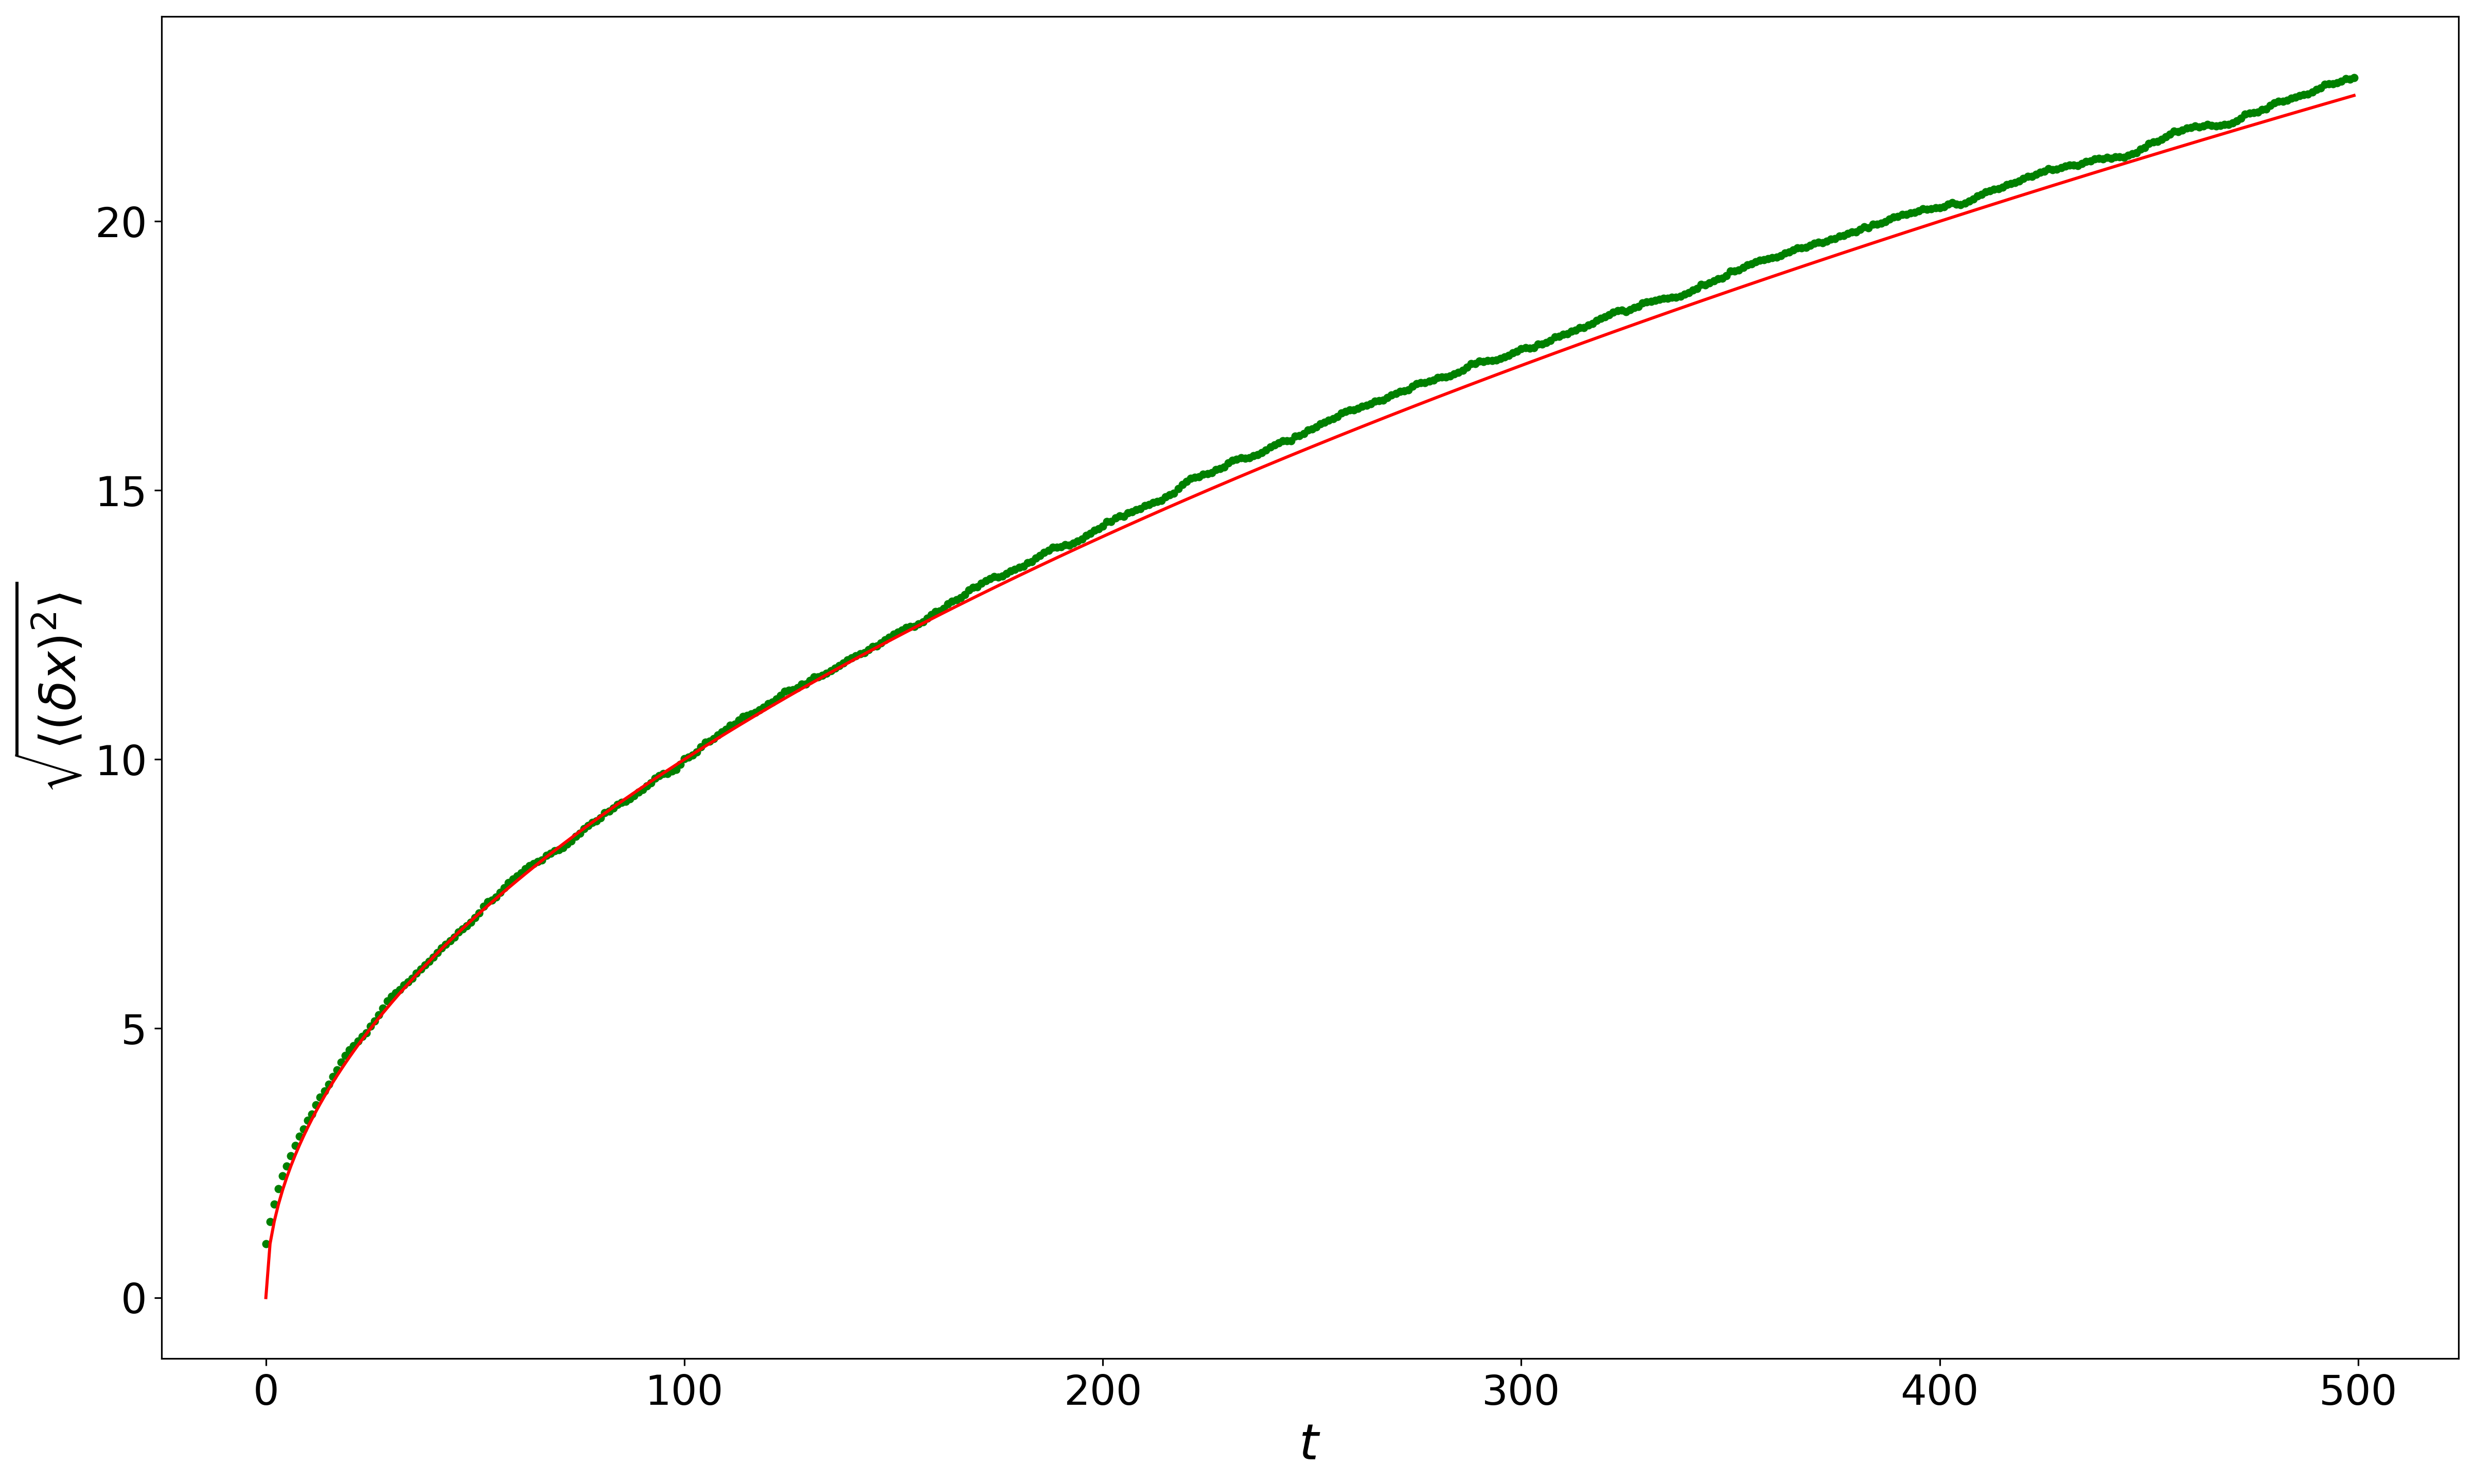

In [6]:
n_person = 2000
n_times = 500

t = np.arange(n_times)
steps = 2 * np.random.random_integers(0, 1, (n_person, n_times)) - 1

amount = np.cumsum(steps, axis=1)
sd_amount = amount ** 2
mean_sd_amount = sd_amount.mean(axis=0)

plt.figure(figsize=(20, 12), dpi=144)
plt.xlabel(r"$t$", fontsize=24)
plt.tick_params(labelsize=20)
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$", fontsize=24)
plt.plot(t, np.sqrt(mean_sd_amount), 'g.', t, np.sqrt(t), 'r-')
plt.show()

## 多项式拟合

多项式回归的系数： [ 1.17518878 -2.47685561  2.26199063  0.15548579]


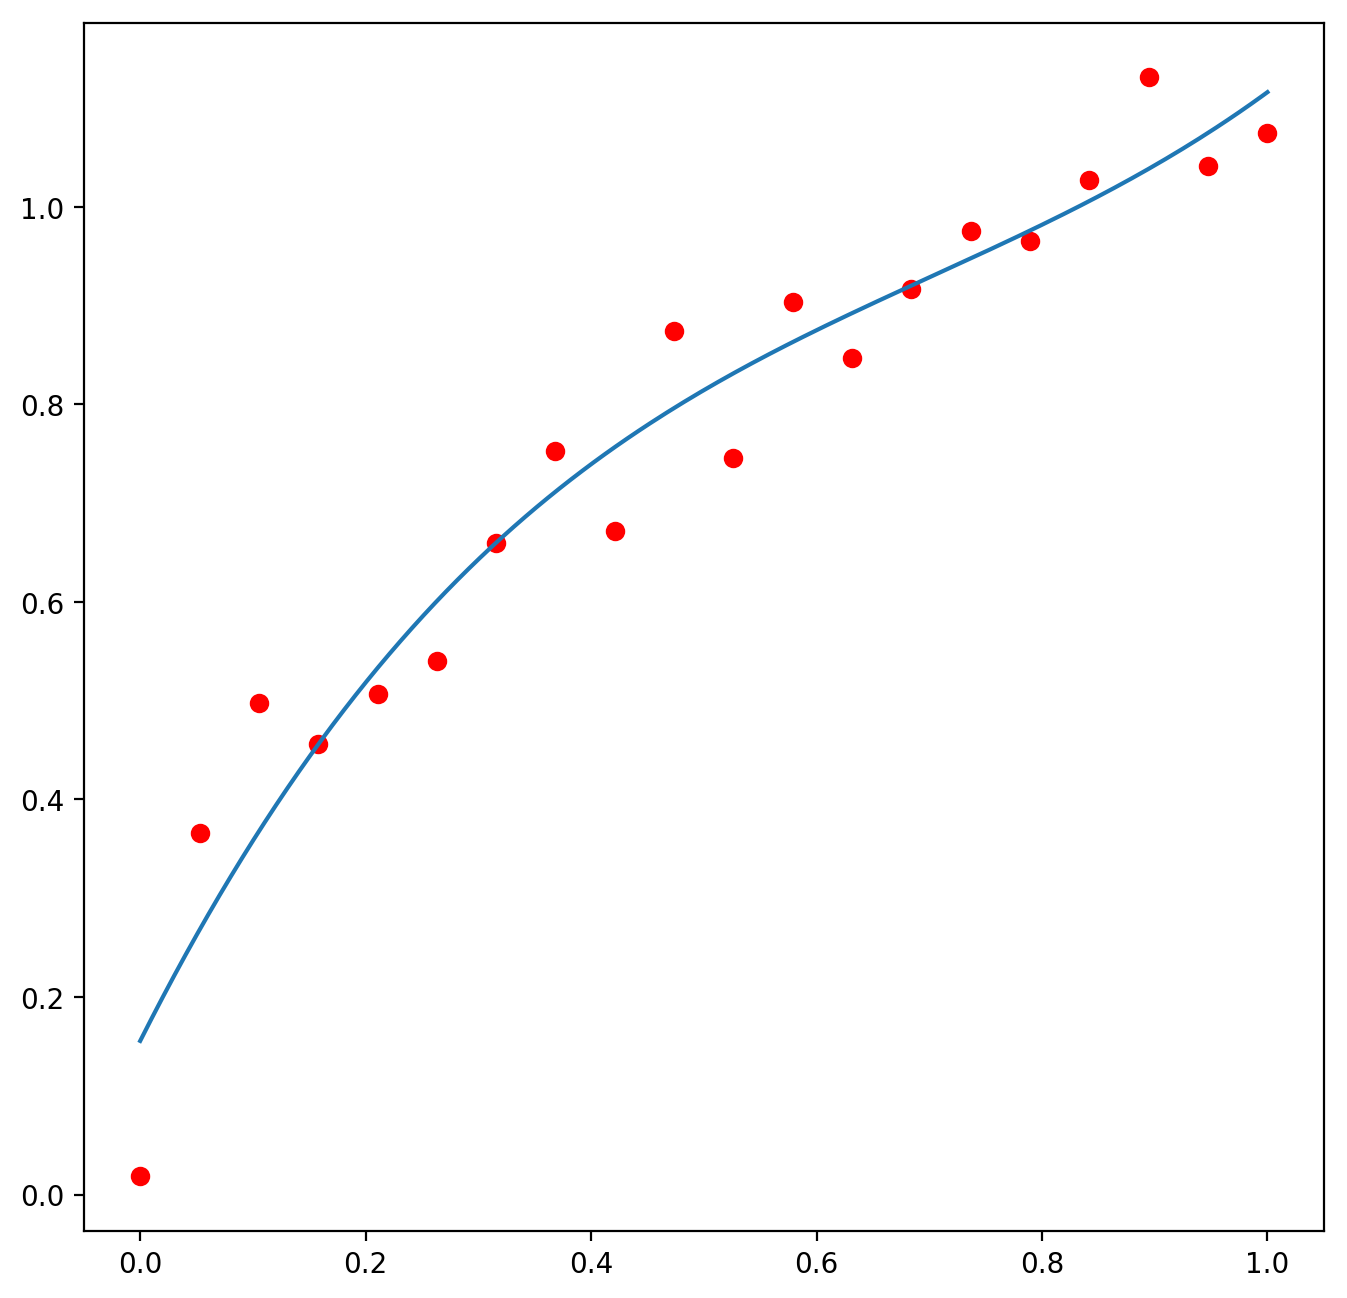

In [19]:
n_dots = 20
n_order = 3

x = np.linspace(0, 1, n_dots)
y = np.sqrt(x) + 0.2 * np.random.rand(n_dots)
p = np.poly1d(np.polyfit(x, y, n_order))
print('多项式回归的系数：', p.coeffs)

t = np.linspace(0, 1, 200)
plt.figure(figsize=(8, 8), dpi=100)

# 描点
plt.plot(x, y, 'ro')
# 绘制拟合曲线
plt.plot(t, p(t), '-')

# 以上两行可以合并
# plt.plot(x, y, 'ro', t, p(t), '-')
plt.show()

## 蒙特卡罗方法求圆周率

In [11]:
n_dots = 1000000
x = np.random.random(n_dots)
y = np.random.random(n_dots)
distance = np.sqrt(x ** 2 + y ** 2)
in_circle = distance[distance < 1]

pi = 4 * float(len(in_circle)) / n_dots
print(pi)

3.143396
